# Analyzing Popular Application Categoryon Google Play Store

In the ever-expanding landscape of mobile applications, choosing the right category to develop an app can significantly influence its success. With millions of apps available on the Google Play Store, developers face the challenge of not only creating innovative solutions but also ensuring visibility amidst fierce competition. Therefore, a thorough analysis of popular application categories on the Google Play Store becomes imperative for making informed decisions.

This analysis aims to dive into the trends and patterns within various application categories to identify potential areas with less competition, offering developers valuable insights into where to focus their efforts for maximum impact. By examining factors such as user engagement, download statistics, and market saturation across different categories, we can pinpoint opportunities that align with emerging trends and consumer demands.

Ultimately, the goal is to leverage data-driven insights to inform strategic decision-making, enabling developers to channel their resources effectively and increase the likelihood of app success in a crowded marketplace. Through this exploration, we aim to uncover hidden gems within the Google Play Store ecosystem, providing valuable guidance for developers seeking to carve out their niche and thrive in the dynamic world of mobile applications.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gs_data=pd.read_csv('googleplaystore.csv')

In [3]:
gs_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
gs_data["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

* Category 1.9 has actally missing Category and Genre so find and insert its category and genre from google playstore 

In [5]:
gs_data[gs_data["Category"]== "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [6]:
gs_data[gs_data["Category"]== "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [7]:
cl_lst=['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'LIFESTYLE', 'February 11, 2018',
        '1.0.19', '4.0 and up']

In [8]:
gs_data[gs_data["Category"]== "1.9"]=cl_lst

In [9]:
gs_data["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

* Found Some duplicate apps so remove duplicate by eeping Apps with higher reviews

In [10]:
app_count =gs_data["App"].value_counts()

In [11]:
app_count[app_count>1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

In [12]:
dup_apps = gs_data[gs_data.duplicated(subset=['App'], keep = False)]

In [13]:
dup_apps[dup_apps['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [14]:
num_dup_apps=dup_apps['App'].nunique()
num_dup_apps

798

In [15]:
max_review = gs_data.groupby('App')['Reviews'].max()

In [16]:
max_review

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [17]:
android_cl=[]

already_added=[]

for index,row in gs_data.iterrows():
    name= row["App"]
    n_reviews = row["Reviews"]
    
    if (max_review[name] == n_reviews) and (name not in already_added):
        android_cl.append(row)
        already_added.append(name)
        
    

In [18]:
android_cl=pd.DataFrame(android_cl)

In [19]:
android_cl.shape

(9660, 13)

* Removing Apps with Non English Names

In [20]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    
    check = set(lst)
    
    if False in check:
        return False
    else:
        return True
    
            
    

In [21]:
def is_english(app_name):
    lst=[]
    for i in app_name:
        if ord(i) > 127:
            lst.append(False)
        else:
            lst.append(True)
    
    non_ascii = 0
    for j in lst:
        if j == False:
            non_ascii +=1
            
    if non_ascii > 3:
        return False
    else:
        return True

In [22]:
android_eng=android_cl[android_cl["App"].apply(is_english)]

In [23]:
android_eng.shape

(9615, 13)

In [24]:
android_fnl=android_eng[android_eng["Price"]=="0"]

In [25]:
android_fnl.shape

(8863, 13)

In [26]:
android_fnl["Category"].value_counts(normalize="True")*100

FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
ART_AND_DE

In [27]:
round(android_fnl["Category"].value_counts(normalize = True) * 100,1)[:15]


FAMILY                18.9
GAME                   9.7
TOOLS                  8.5
BUSINESS               4.6
LIFESTYLE              3.9
PRODUCTIVITY           3.9
FINANCE                3.7
MEDICAL                3.5
SPORTS                 3.4
PERSONALIZATION        3.3
COMMUNICATION          3.2
HEALTH_AND_FITNESS     3.1
PHOTOGRAPHY            2.9
NEWS_AND_MAGAZINES     2.8
SOCIAL                 2.7
Name: Category, dtype: float64

* Finding Top Android App Category

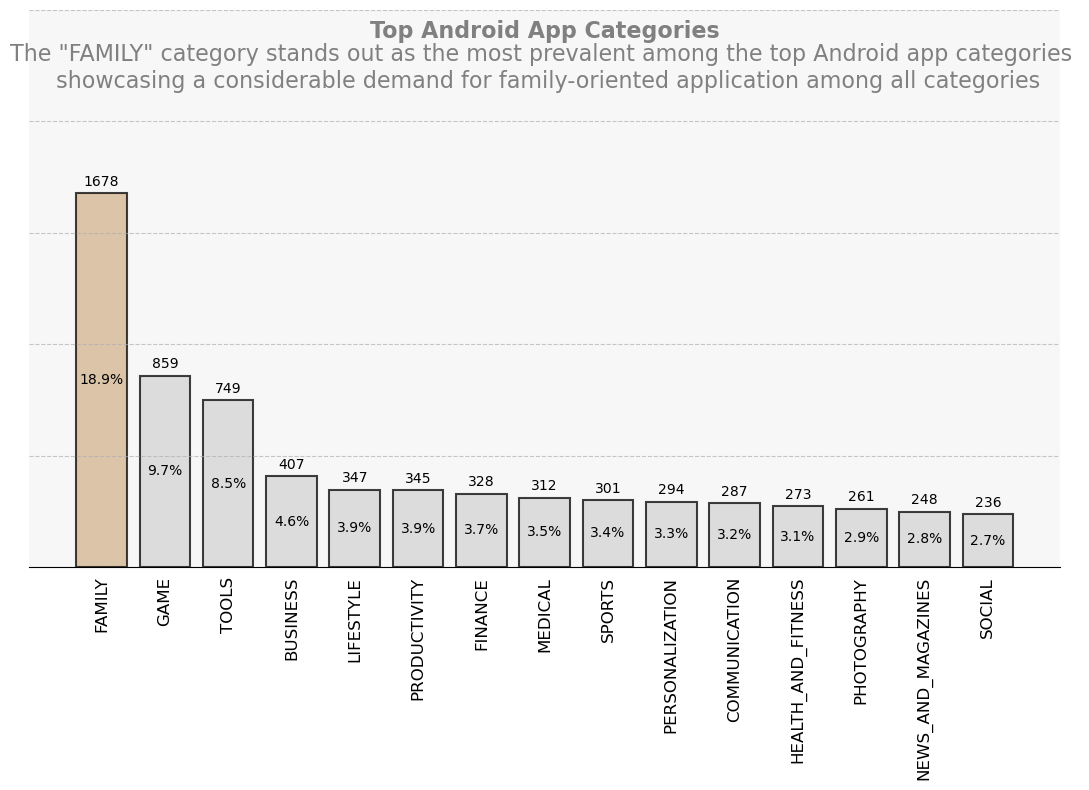

In [28]:
categories = android_fnl["Category"].value_counts().index[:15]
cnts = android_fnl["Category"].value_counts().values[:15]
percent = round(android_fnl["Category"].value_counts(normalize = True) * 100,1)[:15]

plt.figure(figsize=(12,8))
bars= plt.bar(categories, cnts, color="lightgray", alpha = 0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.7)
plt.grid(axis='x', linestyle=" ")
plt.xticks(fontsize=12)
plt.yticks(range(0,3000,500),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

max_cnt_category=categories[cnts.argmax()]

max_cnt_index= list(categories).index(max_cnt_category)
bars[max_cnt_index].set_color('tan')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.95, "Top Android App Categories", horizontalalignment = 'center', fontsize=16, transform=plt.gca().transAxes, color='gray', fontweight='bold')

plt.text(0.5, 0.86, 'The "FAMILY" category stands out as the most prevalent among the top Android app categories \n showcasing a considerable demand for family-oriented application among all categories',
         horizontalalignment = 'center', fontsize=16, transform=plt.gca().transAxes, color='gray')

for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()



In [29]:
android_fnl["Installs"].value_counts(normalize="True")*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [30]:
android_fnl["Installs_int"]=android_fnl["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\eng-pc31\AppData\Local\Temp\ipykernel_9712\3552871888.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  android_fnl["Installs_int"]=android_fnl["Installs"].str.replace(",","").str.replace("+","").astype(int)
C:\Users\eng-pc31\AppData\Local\Temp\ipykernel_9712\3552871888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_fnl["Installs_int"]=android_fnl["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [31]:
install_frq= android_fnl["Installs_int"].value_counts().sort_index()
install_frq= install_frq[install_frq.index>500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [32]:
install_frq_perc= round(android_fnl["Installs_int"].value_counts(normalize=True)*100,2).sort_index()
install_frq_perc= install_frq_perc[install_frq_perc.index>500]
install_frq_perc

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [33]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [34]:
install_frq.index = install_frq.index.map(alphanumeric_units)

In [35]:
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

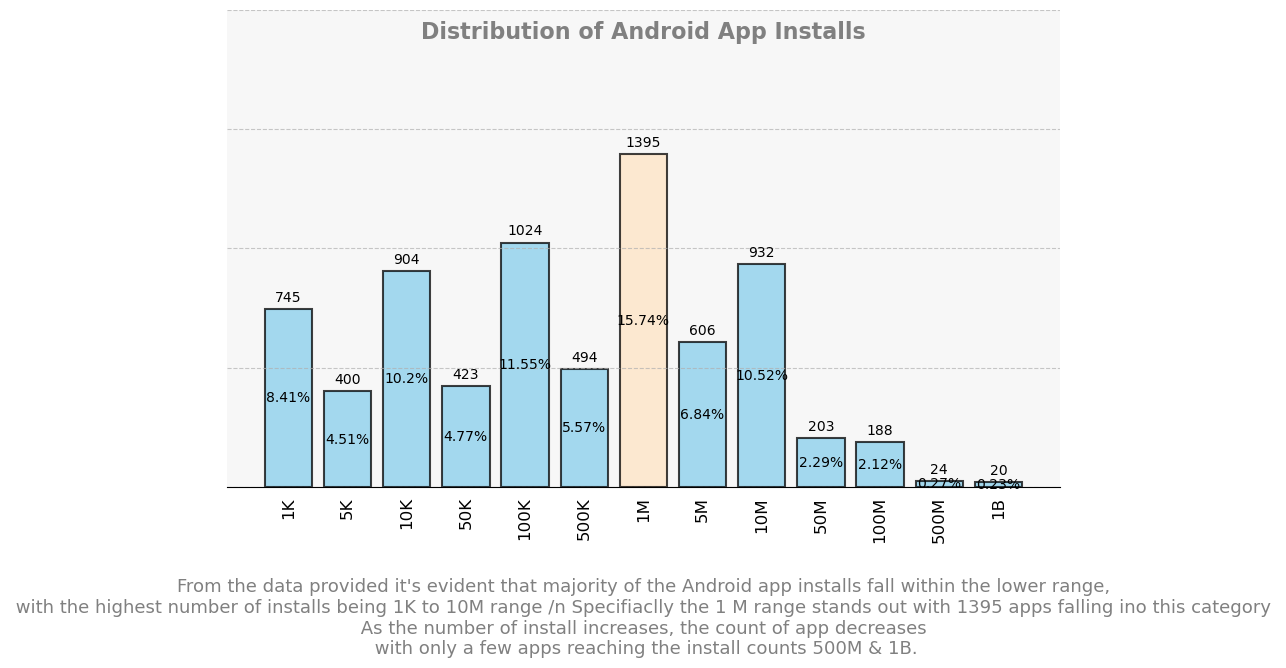

In [36]:
categories = install_frq.index
cnts = install_frq.values
percent = install_frq_perc.values

plt.figure(figsize=(12,7))
bars= plt.bar(categories, cnts, color="skyblue", alpha = 0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.7)
plt.grid(axis='x', linestyle=" ")
plt.xticks(fontsize=12)
plt.yticks(range(0,2500,500),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

max_cnt_category=categories[cnts.argmax()]

max_cnt_index= list(categories).index(max_cnt_category)
bars[max_cnt_index].set_color('bisque')
bars[max_cnt_index].set_edgecolor('black')

for bar, perc in zip(bars, percent):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+20, '%d' % int(height), ha='center', va='bottom', fontsize=10)
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{perc}%', ha='center', va='center', fontsize=10, color='black')
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.94, "Distribution of Android App Installs", horizontalalignment = 'center', fontsize=16, transform=plt.gca().transAxes, color='gray', fontweight='bold')

plt.text(0.5, -0.35, "From the data provided it's evident that majority of the Android app installs fall within the lower range,\n with the highest number of installs being 1K to 10M range /n Specifiaclly the 1 M range stands out with 1395 apps falling ino this category \n As the number of install increases, the count of app decreases \n with only a few apps reaching the install counts 500M & 1B.",
         horizontalalignment = 'center', fontsize=13, transform=plt.gca().transAxes, color='gray')

for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()



In [37]:
categories_android = android_fnl["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [38]:
categories_installs = pd.pivot_table(android_fnl, values='Installs_int', index='Category',aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Installs_int", ascending = False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION          3.845612e+07
VIDEO_PLAYERS          2.472787e+07
SOCIAL                 2.325365e+07
PHOTOGRAPHY            1.780563e+07
PRODUCTIVITY           1.678733e+07
GAME                   1.556097e+07
TRAVEL_AND_LOCAL       1.398408e+07
ENTERTAINMENT          1.164071e+07
TOOLS                  1.068230e+07
NEWS_AND_MAGAZINES     9.549178e+06
BOOKS_AND_REFERENCE    8.767812e+06
SHOPPING               7.036877e+06
PERSONALIZATION        5.201483e+06
WEATHER                5.074486e+06
HEALTH_AND_FITNESS     4.188822e+06
MAPS_AND_NAVIGATION    4.056942e+06
FAMILY                 3.694276e+06
SPORTS                 3.638640e+06
ART_AND_DESIGN         1.986335e+06
FOOD_AND_DRINK         1.924898e+06
EDUCATION              1.820673e+06
BUSINESS               1.712290e+06
LIFESTYLE              1.433676e+06
FINANCE                1.387692e+06
HOUSE_AND_HOME         1.331541e+06
DATING                 8.540288e+05
COMICS                 8.176573e+05
AUTO_AND_VEHICLES  

In [39]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [40]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

* Finding Top Android Category

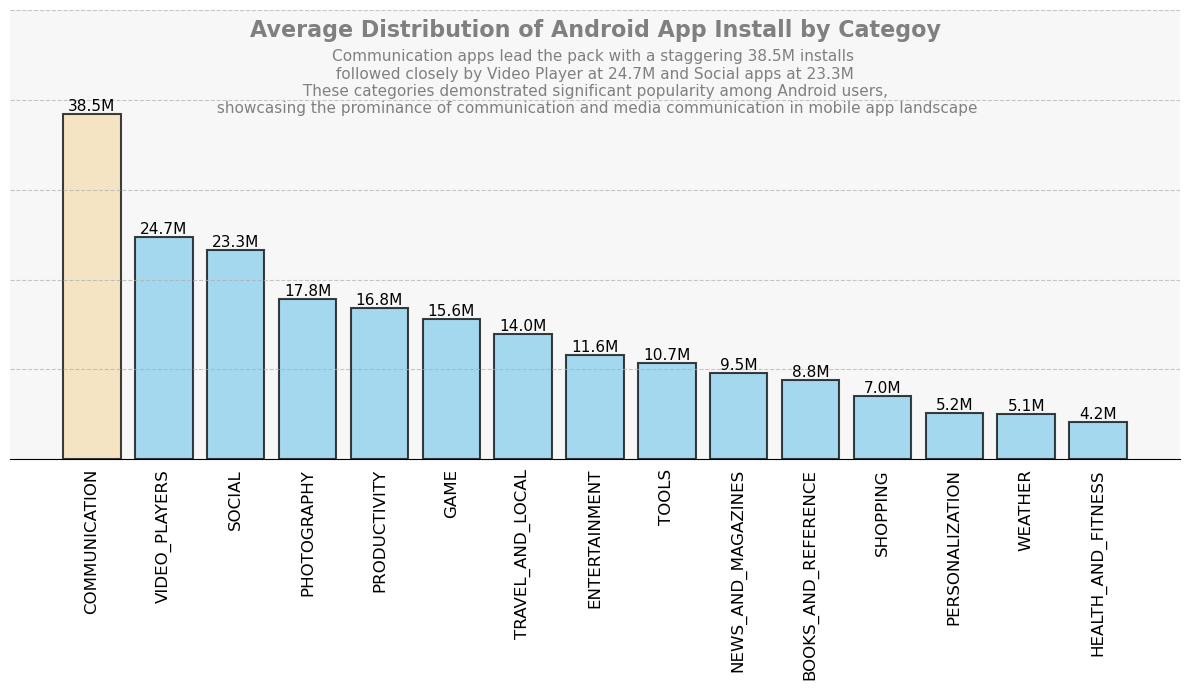

In [41]:
categories = categories_installs.index[:15]
cnts = categories_installs.values[:15]

plt.figure(figsize=(12,7))
bars= plt.bar(categories, cnts, color="skyblue", alpha = 0.75, edgecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha =0.7)
plt.grid(axis='x', linestyle=" ")
plt.xticks(fontsize=12)
plt.yticks(range(0,60000000,10000000),[], fontsize=12)
plt.tick_params(bottom=0, left=0)

max_cnt_category=categories[cnts.argmax()]

max_cnt_index= list(categories).index(max_cnt_category)
bars[max_cnt_index].set_color('wheat')
bars[max_cnt_index].set_edgecolor('black')

for bar, units in zip(bars,categories_installs_unit):
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+25, units, ha='center', va='bottom', fontsize=11)
    
ax=plt.gca()
ax.set_facecolor('#f7f7f7')

plt.text(0.5, 0.94, "Average Distribution of Android App Install by Categoy", horizontalalignment = 'center', fontsize=16, transform=plt.gca().transAxes, color='gray', fontweight='bold')

plt.text(0.5, 0.77, "Communication apps lead the pack with a staggering 38.5M installs \n followed closely by Video Player at 24.7M and Social apps at 23.3M \n These categories demonstrated significant popularity among Android users, \n showcasing the prominance of communication and media communication in mobile app landscape",
         horizontalalignment = 'center', fontsize=11, transform=plt.gca().transAxes, color='gray')

for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()

plt.show()



In [42]:
Category_group = android_fnl.groupby("Category")

In [43]:
comm = Category_group.get_group("COMMUNICATION").sort_values(by='Installs_int', ascending= False)
comm.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [44]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'

In [45]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [46]:
df=comm[["App", "Installs_int"]].head(15)
df["Installs_int_unit"]=df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


# Conclusion:

WhatsApp, Messenger, Hanouts etc. are Giants in the field of communiation and it is not pratically possible to compete with these Applications and to reach the success after developing application in Communication Category.

In [47]:
df=Category_group.get_group("VIDEO_PLAYERS").sort_values(by='Installs_int', ascending= False)
df=df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"]=df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


# Conclusion:

Youtube etc. are also Giants in the field of video players and it is not pratically possible to compete with these Applications also and to reach the success after developing application in this Category.

In [48]:
df=Category_group.get_group("SOCIAL").sort_values(by='Installs_int', ascending= False)
df=df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"]=df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


# Conclusion:

Facebook, Instagram etc. are also Giants in the field of Social Apps and it is not pratically possible to compete with these Applications also and to reach the success after developing application in this Category.

In [49]:
df=Category_group.get_group("PHOTOGRAPHY").sort_values(by='Installs_int', ascending= False)
df=df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"]=df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


## Analysis of Photography Category & Potential for Photo Generation App in 2024

### Conclusion

Based on the analysis of the photography category and the potential for a photo generation app in 2024, it is evident that there is a significant opportunity for development. The data suggests a growing interest in photography, driven by the increasing accessibility of high-quality cameras and the popularity of social media platforms emphasizing visual content.

However, to stand out in the crowded photography app market and ensure the success of our developed app, it is imperative to leverage advanced photography techniques or integrate AI capabilities. By incorporating features such as AI-driven image enhancement, smart composition suggestions, or even automated editing tools, we can offer users unique and valuable functionalities that differentiate our app from competitors.

Furthermore, considering the evolving landscape of photography trends and consumer preferences, continual innovation and adaptation will be essential for maintaining relevance and staying ahead in the market. Embracing emerging technologies and staying attuned to user feedback will enable us to continually enhance our app's capabilities and deliver a superior user experience, ultimately driving its success in 2024 and beyond.

In [50]:
df=Category_group.get_group("PRODUCTIVITY").sort_values(by='Installs_int', ascending= False)
df=df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"]=df["Installs_int"].map(alphanumeric_units)
df

,App,Installs_int,Installs_int_unit
3523,Google Drive,1000000000,1B
3450,Microsoft Word,500000000,500M
3562,Google Calendar,500000000,500M
3574,Cloud Print,500000000,500M
3473,Dropbox,500000000,500M
3524,Adobe Acrobat Reader,100000000,100M
3489,Samsung Notes,100000000,100M
3477,Google Docs,100000000,100M
3493,SwiftKey Keyboard,100000000,100M
7808,CamScanner - Phone PDF Creator,100000000,100M


## Analysis of Productivity Category & Potential for App Generation in 2024

### Conclusion
Another best possible option for App Genration is the Produtivity Category. In analyzing the productivity category and potential for a product generation app in 2024, it's evident that there is a significant opportunity for innovation and development. However, to stand out in this crowded space and ensure the success of our app, it's crucial to leverage advanced techniques such as artificial intelligence (AI).

By incorporating AI into our app, we can provide users with personalized recommendations, automation features, and intelligent insights to enhance their productivity levels. This could include features like smart scheduling, task prioritization, natural language processing for note-taking, and predictive analytics to anticipate user needs.

Furthermore, integrating AI-driven solutions can enable our app to adapt and evolve over time, continually improving its functionality and effectiveness. This adaptability will be essential in meeting the changing demands and preferences of users in the dynamic productivity landscape.